# Problem Statement
### Business problem overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.


# Goal

In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn using different Maching learning techniques and choose which one is giving the best result

# 1: Importing the Libraries

In [2]:
#importing the necessary libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score,precision_score,roc_auc_score,f1_score,accuracy_score,confusion_matrix
from sklearn.metrics import precision_recall_curve

from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import AdaBoostClassifier

import xgboost as xgb

pd.options.display.max_rows = 300
pd.options.display.max_columns = 300

In [3]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

## 2: Importing Data 

In [4]:
# reading the dataset
telecom = pd.read_csv('telecom_churn_data.csv')

In [5]:
# displaying first five rows of the dataset
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [6]:
# checking the datatypes of the varibles of the dataset
telecom.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [7]:
# checking the shape of dataset
telecom.shape

(99999, 226)

In [8]:
# describing the statistical summary of the dataset
telecom.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

# 3: Data Cleaning

### 3.1: Dropping columns of no use for modeling

In [9]:
# dropping date columns as it won't contribute in model building
telecom.drop(columns=['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9',
                        'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9',
                        'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8',
                      'date_of_last_rech_data_9'],axis=1,inplace=True)

In [10]:
# Checking the columns with same values for all rows and dropping such columns as they will have no variance in the model
one_unique_col=[]
for i in telecom.columns:
    if telecom[i].nunique() == 1 :
        one_unique_col.append(i)
    

telecom.drop(one_unique_col, axis=1, inplace = True)
print("\n The columns dropped from the dataset having all values same ::",
      one_unique_col)


 The columns dropped from the dataset having all values same :: ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


In [11]:
#Dropping mobile number as it has a unique value for every row and does not add value to the model building process.
telecom.drop(['mobile_number'],axis=1,inplace=True)
telecom.shape

(99999, 201)

### 3.2: Handling Missing Values

Displaying columns with null % more than 40 

In [12]:
null_perc=telecom.isnull().mean()*100
null_perc[null_perc>40]

total_rech_data_6     74.846748
total_rech_data_7     74.428744
total_rech_data_8     73.660737
total_rech_data_9     74.077741
max_rech_data_6       74.846748
max_rech_data_7       74.428744
max_rech_data_8       73.660737
max_rech_data_9       74.077741
count_rech_2g_6       74.846748
count_rech_2g_7       74.428744
count_rech_2g_8       73.660737
count_rech_2g_9       74.077741
count_rech_3g_6       74.846748
count_rech_3g_7       74.428744
count_rech_3g_8       73.660737
count_rech_3g_9       74.077741
av_rech_amt_data_6    74.846748
av_rech_amt_data_7    74.428744
av_rech_amt_data_8    73.660737
av_rech_amt_data_9    74.077741
arpu_3g_6             74.846748
arpu_3g_7             74.428744
arpu_3g_8             73.660737
arpu_3g_9             74.077741
arpu_2g_6             74.846748
arpu_2g_7             74.428744
arpu_2g_8             73.660737
arpu_2g_9             74.077741
night_pck_user_6      74.846748
night_pck_user_7      74.428744
night_pck_user_8      73.660737
night_pc

As the null percentage is very high for these columns it is better to drop them


In [13]:
# dropping the columns having null percentage greater than 40
telecom.drop(null_perc[null_perc>40].index.values,axis=1 ,inplace=True)

In [14]:
# checking columns having null values less than 40 percent and greater than 0 percent
null_perc[(null_perc<40) & (null_perc>0)].sort_values(ascending=False)

ic_others_9         7.745077
std_ic_t2m_mou_9    7.745077
loc_ic_t2t_mou_9    7.745077
loc_og_t2f_mou_9    7.745077
loc_ic_t2m_mou_9    7.745077
spl_og_mou_9        7.745077
loc_og_t2m_mou_9    7.745077
loc_ic_t2f_mou_9    7.745077
std_og_t2m_mou_9    7.745077
loc_ic_mou_9        7.745077
loc_og_t2t_mou_9    7.745077
std_ic_t2t_mou_9    7.745077
loc_og_mou_9        7.745077
og_others_9         7.745077
roam_og_mou_9       7.745077
isd_og_mou_9        7.745077
std_ic_t2f_mou_9    7.745077
roam_ic_mou_9       7.745077
std_og_mou_9        7.745077
std_ic_mou_9        7.745077
offnet_mou_9        7.745077
spl_ic_mou_9        7.745077
std_og_t2t_mou_9    7.745077
isd_ic_mou_9        7.745077
onnet_mou_9         7.745077
std_og_t2f_mou_9    7.745077
loc_og_t2c_mou_9    7.745077
spl_og_mou_8        5.378054
std_og_mou_8        5.378054
og_others_8         5.378054
loc_ic_mou_8        5.378054
loc_ic_t2t_mou_8    5.378054
loc_ic_t2m_mou_8    5.378054
loc_ic_t2f_mou_8    5.378054
std_ic_t2t_mou

As we can see that null value percentage is less than 8% , so we can replace null values with 0 as it won't affect our analysis and model building

In [16]:
# filling the rows with null values with zero
telecom = telecom.fillna(0)

In [17]:
# checking if any remaining column still has null values
null_perc=telecom.isnull().mean()*100
null_perc[null_perc>0]

Series([], dtype: float64)

No columns have null value now

In [18]:
# checking the shape of dataset after cleaning
telecom.shape

(99999, 165)

# Data Pre-processing

### HIGH VALUE CUSTOMER

High-value customers are those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase)

In [19]:
# total data recharge amount for month 6 and 7 
telecom['avg_rech_amnt_6&7'] = (telecom['total_rech_amt_6'] + telecom['total_rech_amt_7'])/2

In [20]:
# creating a new variable 'aon_months' which signifies the age on network (in months) for the customer
telecom['aon_months'] = (telecom['aon']/30).round(0)

# Since we derived a new column from 'aon', we can drop it
telecom.drop('aon',axis=1, inplace=True)

In [21]:
# creating a variable 'threshold' with value above which every customer will be classified as high value customer
threshold = telecom['avg_rech_amnt_6&7'].quantile(0.7)

print('Recharge amount at 70th percentile is :',threshold)

Recharge amount at 70th percentile is : 368.5


In [22]:
#creating a dataset having information of only high value customer and checking its shape
telecom_high_val_cust = telecom[telecom['avg_rech_amnt_6&7'] > threshold]
telecom_high_val_cust.shape

(29979, 166)

### Tag churners and remove attributes of the churn phase

In [23]:
churn_attributes = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9','vol_3g_mb_9']

In [24]:
#Condition for churn is identifying those customers 
# who have not made any calls (either incoming or outgoing) ('total_ic_mou_9', 'total_og_mou_9')
# AND have not used mobile internet ('vol_2g_mb_9','vol_3g_mb_9') even once in the churn phase.


# creating a column churn to tag customers on the basis of churn attributes
telecom_high_val_cust['churn'] = telecom_high_val_cust.apply(lambda x: 1 if (x['total_ic_mou_9']==0 and x['total_og_mou_9']==0 and
                                                                           x['vol_2g_mb_9']==0 and x['vol_3g_mb_9']==0) else 0, axis=1) 

In [25]:
# dropping the attributes of the churn phase as they are if no use now
churn_month_cols = telecom_high_val_cust.columns[telecom_high_val_cust.columns.str.contains('_9')]
telecom_high_val_cust.drop(churn_month_cols,axis=1,inplace=True)
telecom_high_val_cust.drop(columns=['sep_vbc_3g'],axis=1,inplace=True) # also a churn phase column

In [26]:
# checking the shape of data 
telecom_high_val_cust.shape

(29979, 126)

In [27]:
# reset the index
telecom_high_val_cust.reset_index(inplace=True,drop=True)
telecom_high_val_cust.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  1069.180  1349.850  3171.480        57.84        54.68        52.29   
1   378.721   492.223   137.362       413.69       351.03        35.08   
2   492.846   205.671   593.260       501.76       108.39       534.24   
3   430.975   299.869   187.894        50.51        74.01        70.61   
4   690.008    18.980    25.499      1185.91         9.28         7.79   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0        453.43        567.16        325.91          16.23          33.49   
1         94.66         80.63        136.48           0.00           0.00   
2        413.31        119.28        482.46          23.53         144.24   
3        296.29        229.74        162.76           0.00           2.83   
4         61.64          0.00          5.54           0.00           4.76   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0          31.64          23.74          12.59          38.06   
1           0.00           0.00           0.00           0.00   
2          72.11           7.98          35.26           1.44   
3           0.00           0.00          17.74           0.00   
4           4.81           0.00           8.46          13.34   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0             51.39             31.38             40.28            308.63   
1            297.13            217.59             12.49             80.96   
2             49.63              6.19             36.01            151.13   
3             42.61             65.16             67.38            273.29   
4             38.99              0.00              0.00             58.54   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0            447.38            162.28             62.13             55.14   
1             70.58             50.54              0.00              0.00   
2             47.28            294.46              4.54              0.00   
3            145.99            128.28              0.00              4.48   
4              0.00              0.00              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0             53.23               0.0               0.0              0.00   
1              0.00               0.0               0.0              7.15   
2             23.51               0.0               0.0              0.49   
3             10.26               0.0               0.0              0.00   
4              0.00               0.0               0.0              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0        422.16        533.91        255.79              4.30   
1        378.09        288.18         63.04            116.56   
2        205.31         53.48        353.99            446.41   
3        315.91        215.64        205.93              7.89   
4         97.54          0.00          0.00           1146.91   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0             23.29             12.01             49.89             31.76   
1            133.43             22.58             13.69             10.04   
2             85.98            498.23            255.36             52.94   
3              2.58              3.23             22.99             64.51   
4              0.81              0.00              1.55              0.00   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0             49.14              6.66             20.08             16.68   
1             75.69              0.00              0.00              0.00   
2            156.94              0.00              0.00              0.00   
3             18.29              0.00              0.00              0.00   
4              0.00              0.00              0.00              0.00   



# Data Imbalance

In [28]:
# checking percentage of churn and non-churn customer
telecom_high_val_cust['churn'].value_counts(normalize=True)*100

0    91.363955
1     8.636045
Name: churn, dtype: float64

Data is highly imbalanced as the churn rate is only 8.6% while non-churn rate is 91.3%

# EDA

In [29]:
# describing the final data
telecom_high_val_cust.describe()

arpu_6        arpu_7        arpu_8  onnet_mou_6   onnet_mou_7  \
count  29979.000000  29979.000000  29979.000000  29979.00000  29979.000000   
mean     587.587624    589.424681    535.067748    296.23634    304.591922   
std      442.848876    463.049067    492.447887    460.94123    481.966821   
min    -2258.709000  -2014.045000   -945.808000      0.00000      0.000000   
25%      364.352500    365.235000    289.782000     41.17000     41.045000   
50%      495.951000    493.781000    452.232000    125.89000    125.560000   
75%      704.184500    700.986000    671.349500    353.50000    360.360000   
max    27731.088000  35145.834000  33543.624000   7376.71000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  29979.000000  29979.000000  29979.000000  29979.000000   29979.000000   
mean     267.809147    418.127743    424.103446    375.159926      17.428073   
std      466.750205    470.773248    486.710075    477.656991      79.192826   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%       27.070000    137.340000    135.690000     95.730000       0.000000   
50%       99.590000    282.260000    282.040000    241.040000       0.000000   
75%      298.215000    523.625000    532.905000    483.000000       0.000000   
max    10752.560000   8362.360000   9667.130000  14007.340000    2613.310000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   29979.000000   29979.000000   29979.000000   29979.000000   
mean       13.535270      13.263074      29.348362      22.056425   
std        76.343222      74.588105     118.629898      97.974803   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      3813.290000    4169.810000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   29979.000000      29979.000000      29979.000000      29979.000000   
mean       21.483542         94.733562         95.787420         87.184563   
std       106.294911        236.960935        248.250149        234.833442   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          8.330000          9.130000          5.790000   
50%         0.000000         32.610000         33.190000         28.640000   
75%         0.000000         91.550000         91.535000         84.700000   
max      5337.040000       6431.330000       7400.660000      10752.560000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      29979.000000      29979.000000      29979.000000      29979.000000   
mean         181.336751        181.323574        167.616746          6.979198   
std          250.231261        240.815912        234.896621         22.671604   
min            0.000000          0.000000          0.000000          0.000000   
25%           30.290000         33.580000         22.420000          0.000000   
50%          101.280000        104.360000         89.880000          0.330000   
75%          240.230000        239.485000        223.615000          5.090000   
max         4729.740000       4557.140000       4961.330000       1466.030000   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
count      29979.000000      29979.000000      29979.000000       29979.00000   
mean           7.100147          6.496088          1.567723           1.86379   
std           22.599153         20.228358          6.892348           9.26021   
min            0.000000          0.000000          0.000000           0.00000   
25%            0.000000          0.000000          0.000000           0.00000   
50%            0.400000          0.160000       

## Univariate Analysis

In [30]:
# function for plotting graphs for univariate continuous analysis  

def cont_univ_plots(columns) : 
   
    fig = plt.figure(figsize=(15,8))
    ax1 = fig.add_subplot(1,3,1)
    sns.boxplot(x='churn', y = columns[0], data = telecom_high_val_cust, ax=ax1)
    title_ = ''.join(columns[0]) +' vs Churn'
    ax1.set(title= title_)
        
    ax2 = fig.add_subplot(1,3,2)
    sns.boxplot(x='churn', y = columns[1], data = telecom_high_val_cust, ax=ax2)
    title_ = ''.join(columns[1]) +' vs Churn'
    ax2.set(title= title_)
    
    ax3 = fig.add_subplot(1,3,3)
    sns.boxplot(x='churn', y = columns[2], data = telecom_high_val_cust, ax=ax3)
    title_ = ''.join(columns[2]) +' vs Churn'
    ax3.set(title= title_)
    
    plt.subplots_adjust(wspace=0.3)

In [31]:
# function for for plotting graphs for univariate categorical analysis

def cat_univ_plots(columns,scale='linear',figsize=(16,4)) : 
    
    fig = plt.figure(figsize=figsize)
    
    ax1 = fig.add_subplot(1,3,1)
    sns.countplot(x=columns[0],hue='churn',data=telecom_high_val_cust, ax=ax1)
    title = columns[0] + ' vs No of Customers'
    ax1.set(title= title)
    if scale == 'log' :
        plt.yscale('log')
        ax1.set(ylabel= 'Customer count' + '  (in log scale)')
    ax1.legend(loc='upper right')

    
    ax2 = fig.add_subplot(1,3,2)
    sns.countplot(x=columns[1],hue='churn',data=telecom_high_val_cust, ax=ax2)
    title = columns[1] + ' vs No of Customers'
    ax2.set(title= title)
    if scale == 'log' :
        plt.yscale('log')
        ax2.set(ylabel= 'Customer count' + '  (in log scale)')
    ax2.legend(loc='upper right')

        
    ax3 = fig.add_subplot(1,3,3)
    sns.countplot(x=columns[2],hue='churn',data=telecom_high_val_cust, ax=ax3)
    title = columns[2] + ' vs No of Customers'
    ax3.set(title= title)
    if scale == 'log' :
        plt.yscale('log')
        ax3.set(ylabel= 'Customer count' + '  (in log scale)')
    ax3.legend(loc='upper right')

        

Analysing average revenue per user for good and action phase

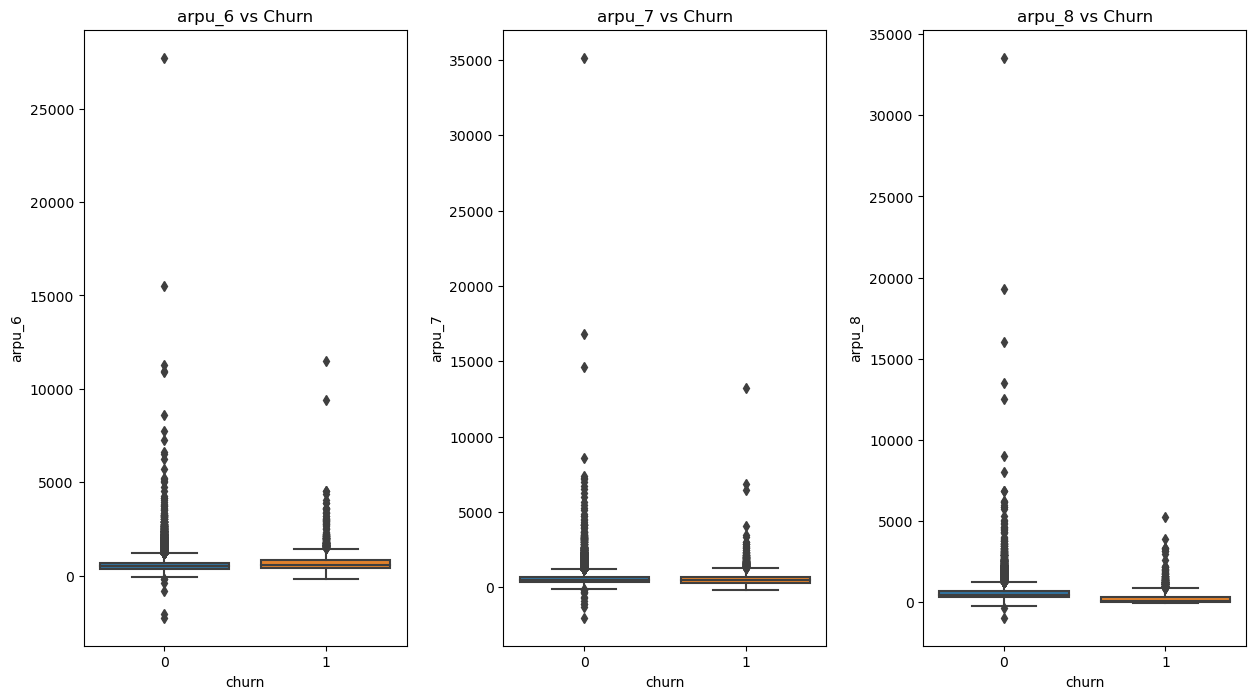

In [32]:
# boxplot for the columns to be analysed
columns = ['arpu_6','arpu_7','arpu_8']
cont_univ_plots(columns)

#### Observations:

- The mean value for average revenue per user for churn and non-churn customers are equal for month 6,7 respectively.

- The mean value of average revenue per user for churn is slightly lower compares to non-churn customers in month 8.

- Mean value of average revenue per customer has constantly decreased over the three months for both churn and non-churn customers.

Analysing total outgoing calls for good and action phase

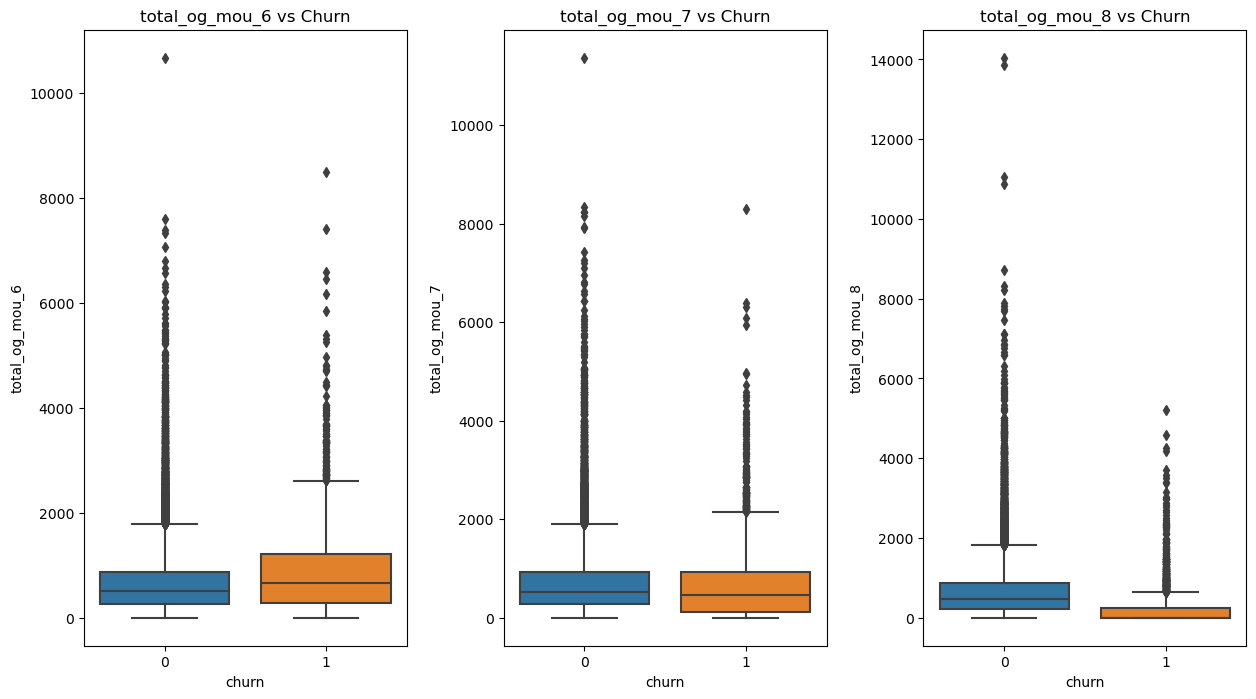

In [33]:
# boxplot for the columns to be analysed
columns = ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']
cont_univ_plots(columns)

### Observations:

- The mean value of outgoing calls for all good and action phase is same except for churners in action phase which is lower  than the others.

- All of them have clear outliers which needs to be handled.

Analysing total incoming calls for good and action phase

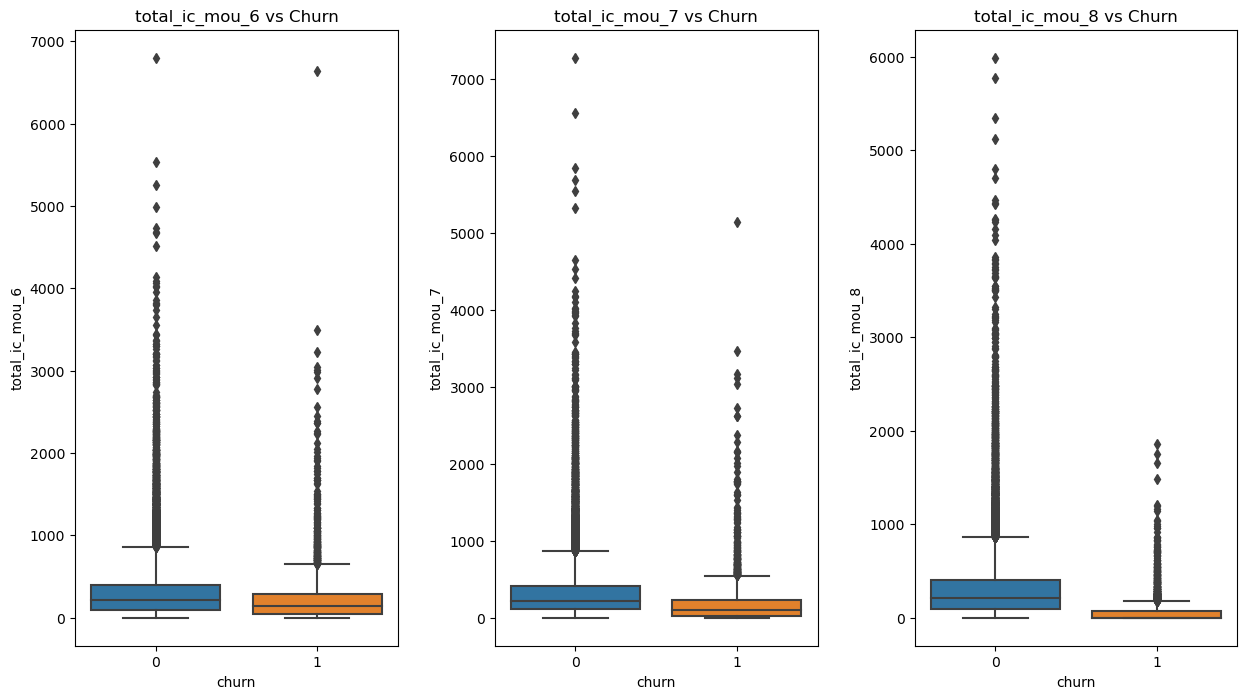

In [34]:
# boxplot for the columns to be analysed
columns = ['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']
cont_univ_plots(columns)

#### Observations:

- The mean value of incoming calls for non-churners is approximately equal for good and action .

- The mean value of incoming calls for churners is approximately equal for good and action and is lower than non-chuners. 

Analysing 2G network data usage for good and action phase

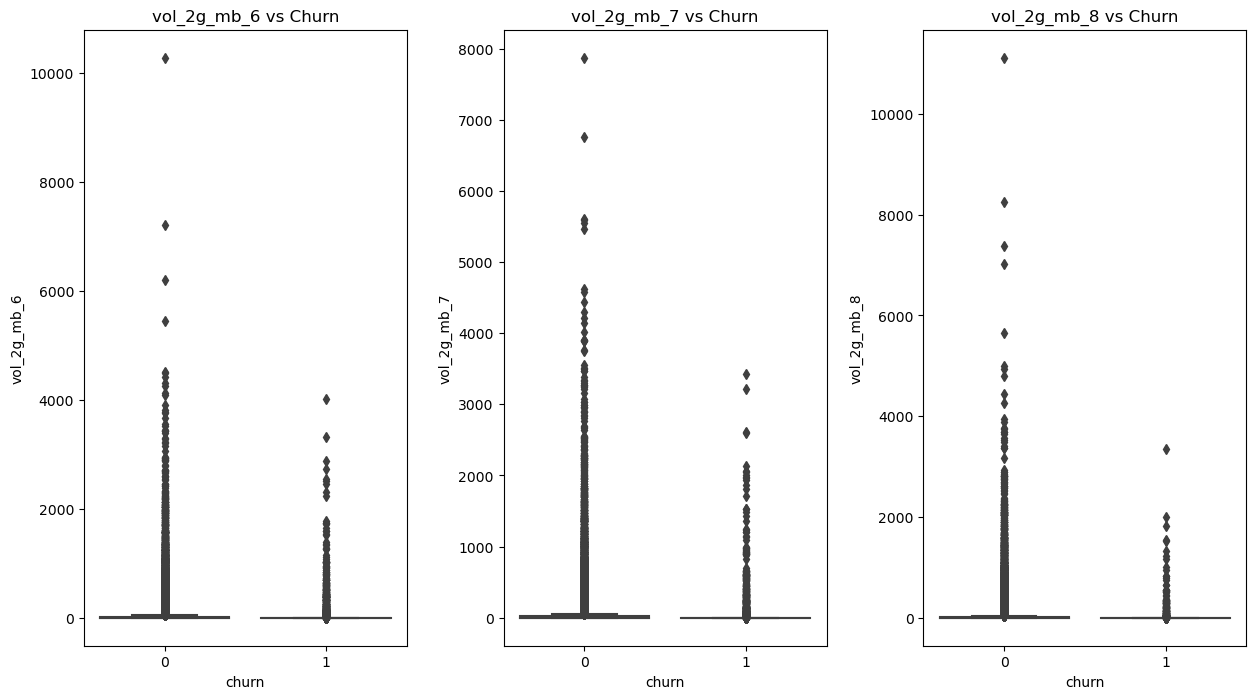

In [35]:
# boxplot for the columns to be analysed
columns = ['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8']
cont_univ_plots(columns)

Analysing 3G network data usage for good and action phase

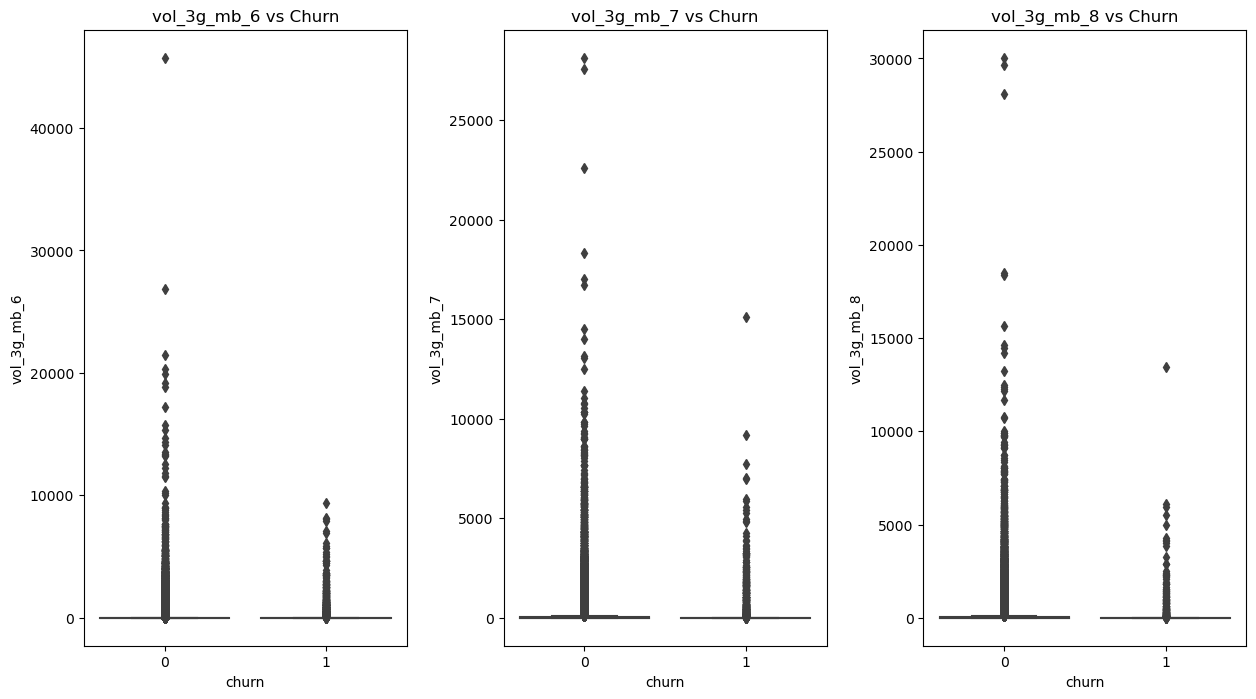

In [36]:
# boxplot for the columns to be analysed
columns = ['vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8']
cont_univ_plots(columns)

Analysing aug_vbc_3g, jul_vbc_3g, jun_vbc_3g  (vbc is Volume based cost - when no specific scheme is purchased and paid as per usage)

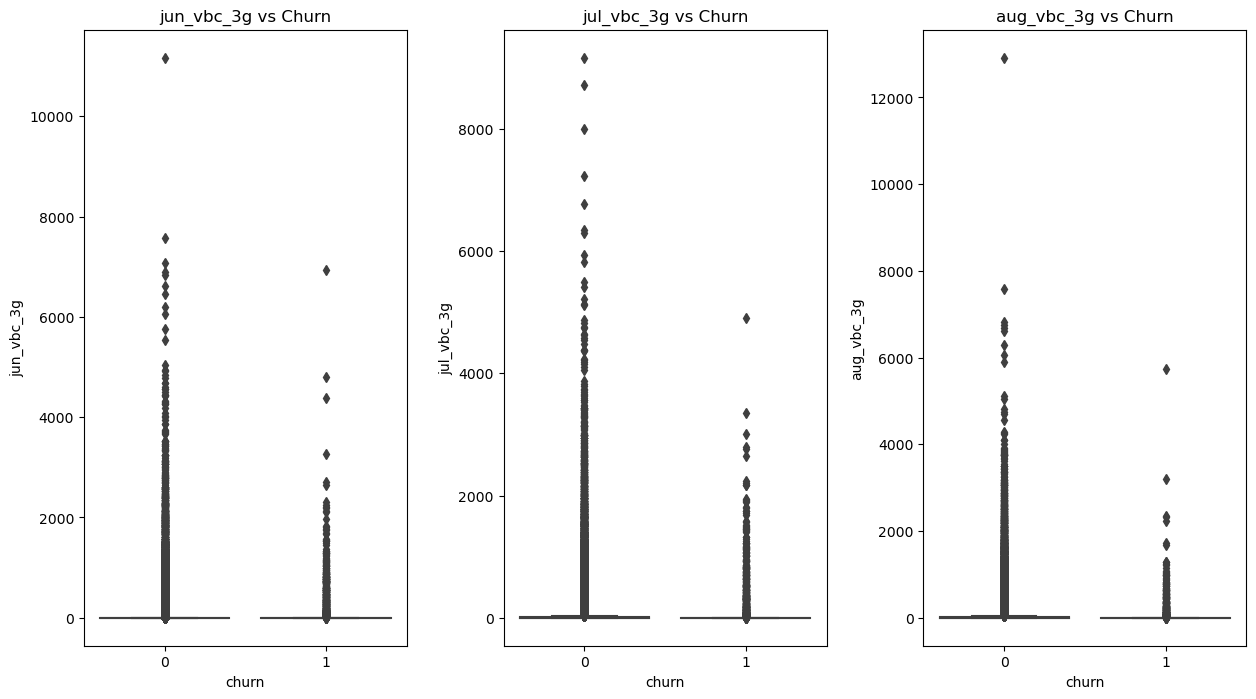

In [37]:
columns = ['jun_vbc_3g', 'jul_vbc_3g', 'aug_vbc_3g']
cont_univ_plots(columns)

Analysing number of customer monthly usage of 2G network for good and action phase

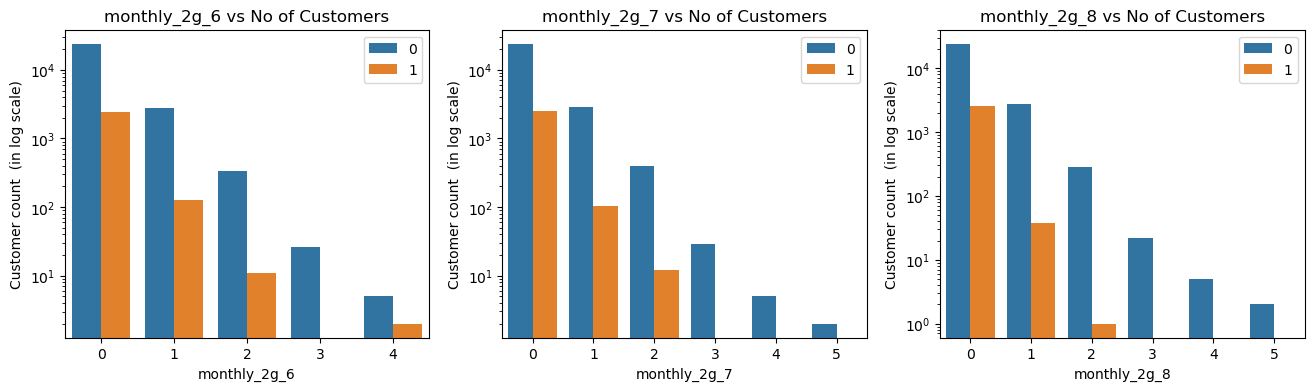

In [38]:
columns = ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8']
cat_univ_plots(columns,'log')

### Observation
- The count of monthly 2G pack purchases by churned customers is decreasing from the 6th month to the 8th month
- By the 8th month(Action phase) , the churned customers had only purchased the monthly 2G pack for 1 month or hardly for 2 months but not more than that. 

Analysing number of customer monthly usage of 3G network for good and action phase

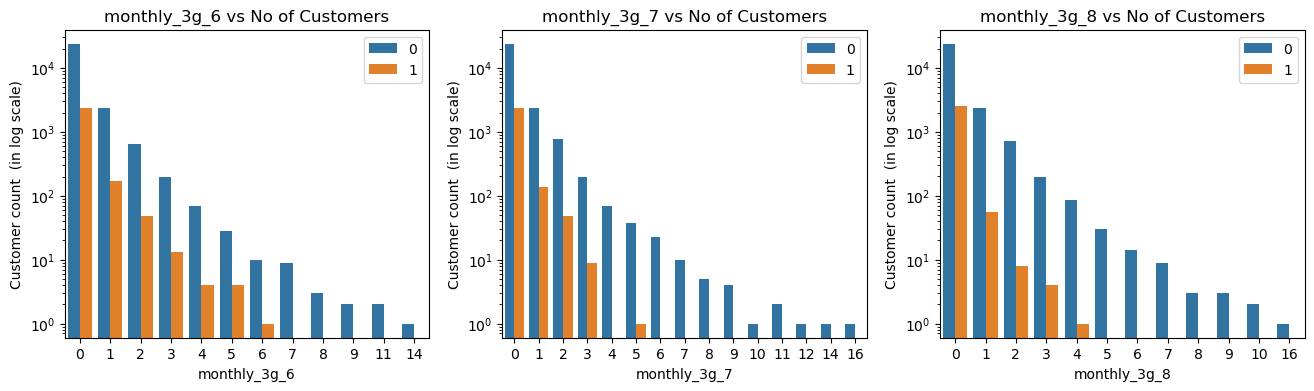

In [39]:
columns = ['monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8']
cat_univ_plots(columns,'log')

### Observation
- The count of monthly 3G pack purchases by churned customers is decreasing from the 6th month to the 8th month

Analysing sachet columns for good and action phase

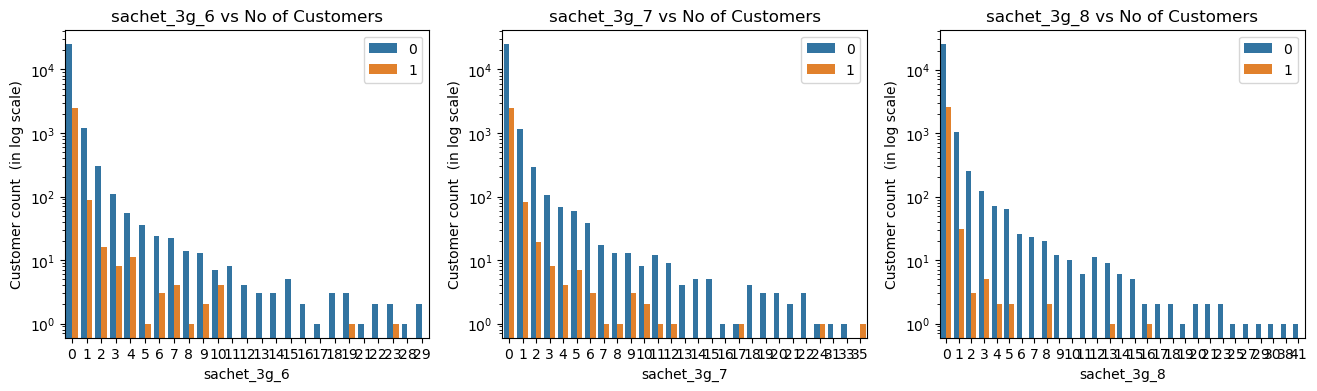

In [40]:
columns = ['sachet_3g_6', 'sachet_3g_7','sachet_3g_8']
cat_univ_plots(columns,'log')

### Observation : 
- The count of sachet 3G pack purchases by churned customers has decreased in the 8th month

Let us analyse the distribution of max recharge amount of action phase with churn

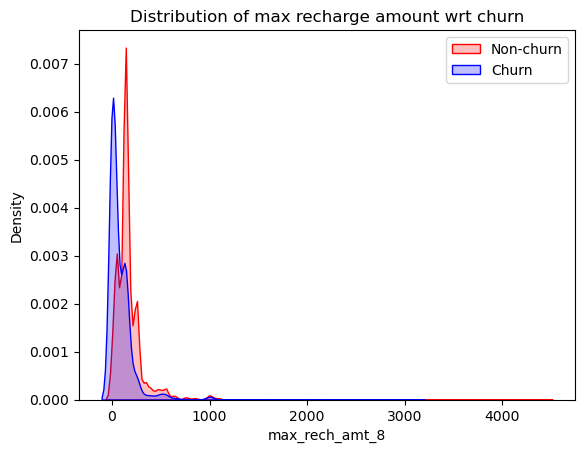

In [41]:
# plot between 'max_rech_amt_8' wrt churn

ax = sns.kdeplot(telecom_high_val_cust.max_rech_amt_8[telecom_high_val_cust.churn==0],color='Red',shade=True)

ax = sns.kdeplot(telecom_high_val_cust.max_rech_amt_8[telecom_high_val_cust.churn==1],color='Blue',shade=True)

plt.legend(['Non-churn','Churn'])
plt.title('Distribution of max recharge amount wrt churn')
plt.show()

### Observations:

- The distrbution for 'max_rech_amt_8' is similar for both churners and non-churners.

- The peak of distrbution is higher for non-churn as compared to churn.

- Max percentage of recharge amount lies between 0-500 for both churners and non-churners.

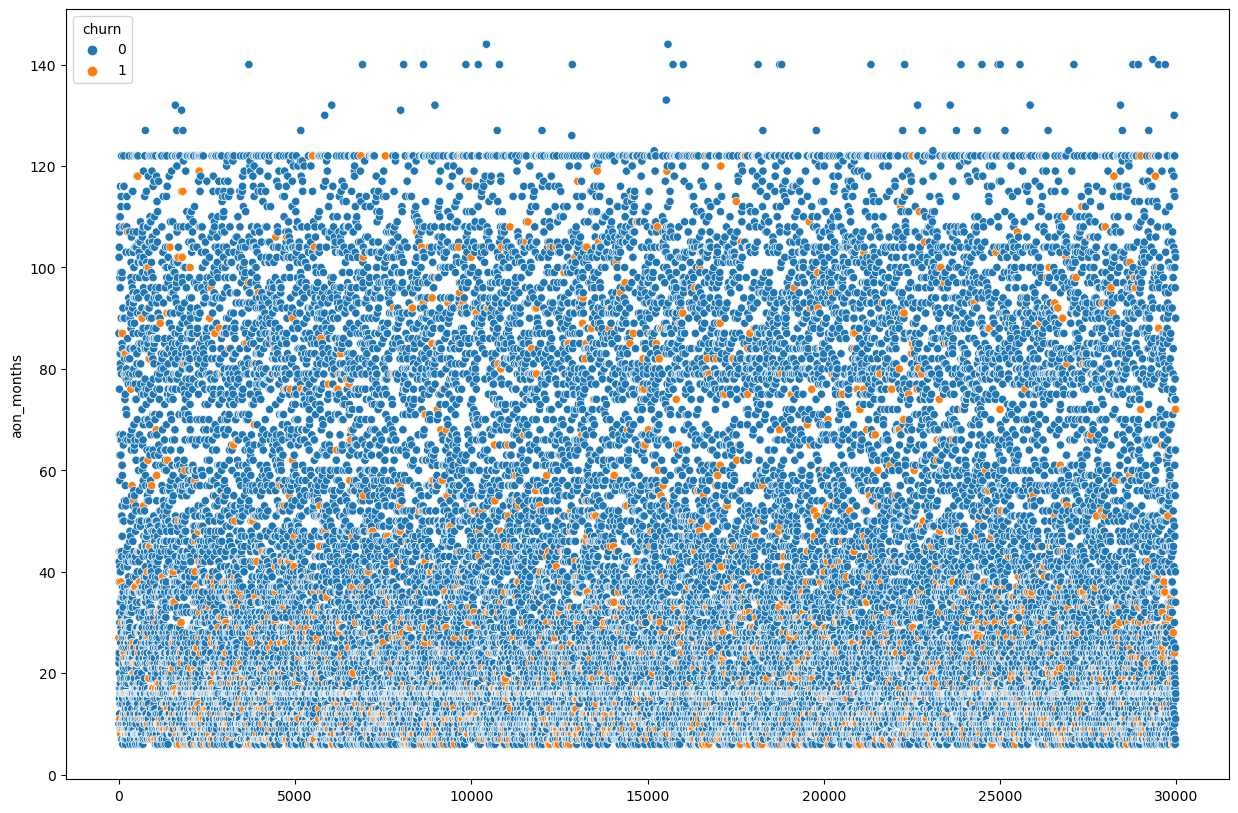

In [42]:
# checking churn based on tenure
plt.figure(figsize=(15,10))
sns.scatterplot(y='aon_months',x=telecom_high_val_cust.index,data=telecom_high_val_cust,hue='churn')
plt.show()

### Observation:
- Though no clear pattern is visible but when can see that no churner has tenure greater than 120 months

## Bivariate Analysis

Analysing tenure and total outgoing in 8th month with respect to Churn.

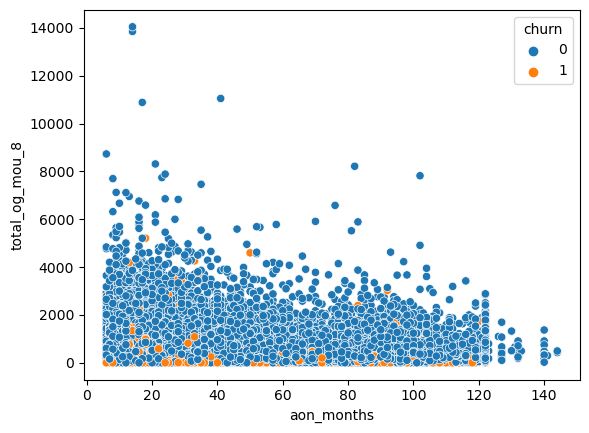

In [43]:
# plotting scatterplot for 'aon_months' and 'total_og_mou_8'
sns.scatterplot(data=telecom_high_val_cust,x='aon_months',y='total_og_mou_8',hue='churn')
plt.show()

Analysing tenure and total incoming in 8th month with respect to Churn.

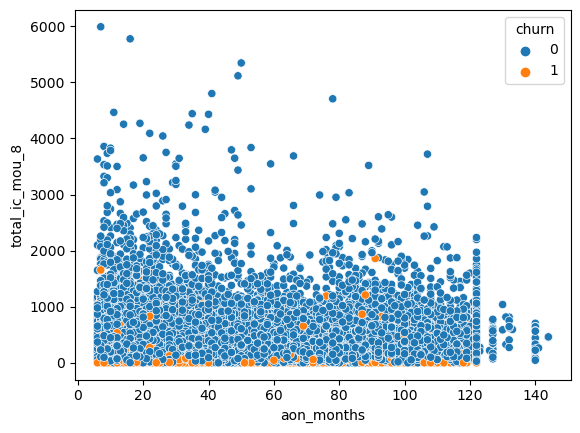

In [44]:
# plotting scatterplot for 'aon_months' and 'total_ic_mou_8'
sns.scatterplot(data = telecom_high_val_cust, x='aon_months',y='total_ic_mou_8',hue='churn')
plt.show()

Let's see the variation of max recharge amount in month 6 with month 8 wrt churn

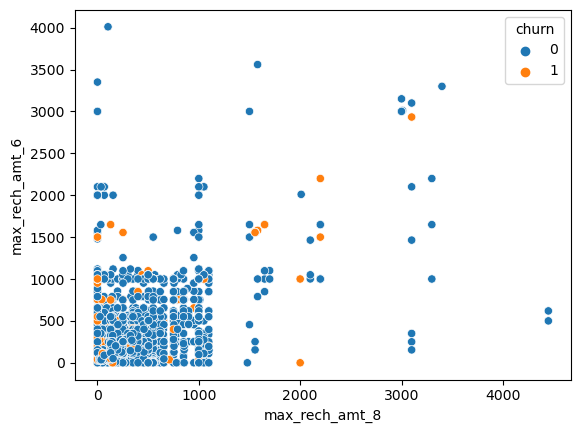

In [45]:
# plot between 'max_rech_amt_8' and 'max_rech_amt_6' wrt churn
sns.scatterplot(data = telecom_high_val_cust, x='max_rech_amt_8',y='max_rech_amt_6',hue='churn')
plt.show()

Let's see the variation of max recharge amount in month 7 with month 8 wrt churn

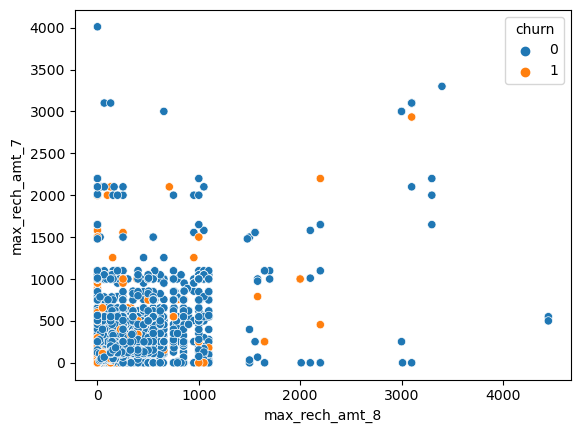

In [46]:
# plot between 'max_rech_amt_8' and 'max_rech_amt_7' wrt churn
sns.scatterplot(data = telecom_high_val_cust, x='max_rech_amt_8',y='max_rech_amt_7',hue='churn')
plt.show()

Analysing the variation of 'arpu_8' with 'total_og_mou_8' and 'total_ic_mou_8' 

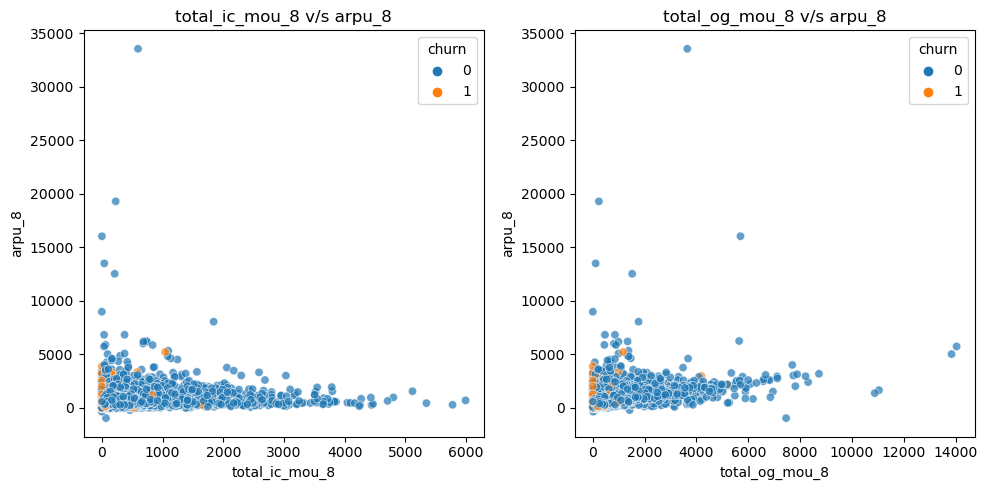

In [47]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)

# plot between 'total_ic_mou_8' and 'arpu_8'
sns.scatterplot(data = telecom_high_val_cust, x='total_ic_mou_8',y='arpu_8',hue='churn',alpha=0.7)
plt.title('total_ic_mou_8 v/s arpu_8')

# plot between 'total_og_mou_8' and 'arpu_8'
plt.subplot(1,2,2)
sns.scatterplot(data = telecom_high_val_cust, x='total_og_mou_8',y='arpu_8',hue='churn',alpha=0.7)
plt.title('total_og_mou_8 v/s arpu_8')

plt.tight_layout()

## Multivariate Analysis

Text(0.5, 1.0, 'Features Correlating with Churn variable')

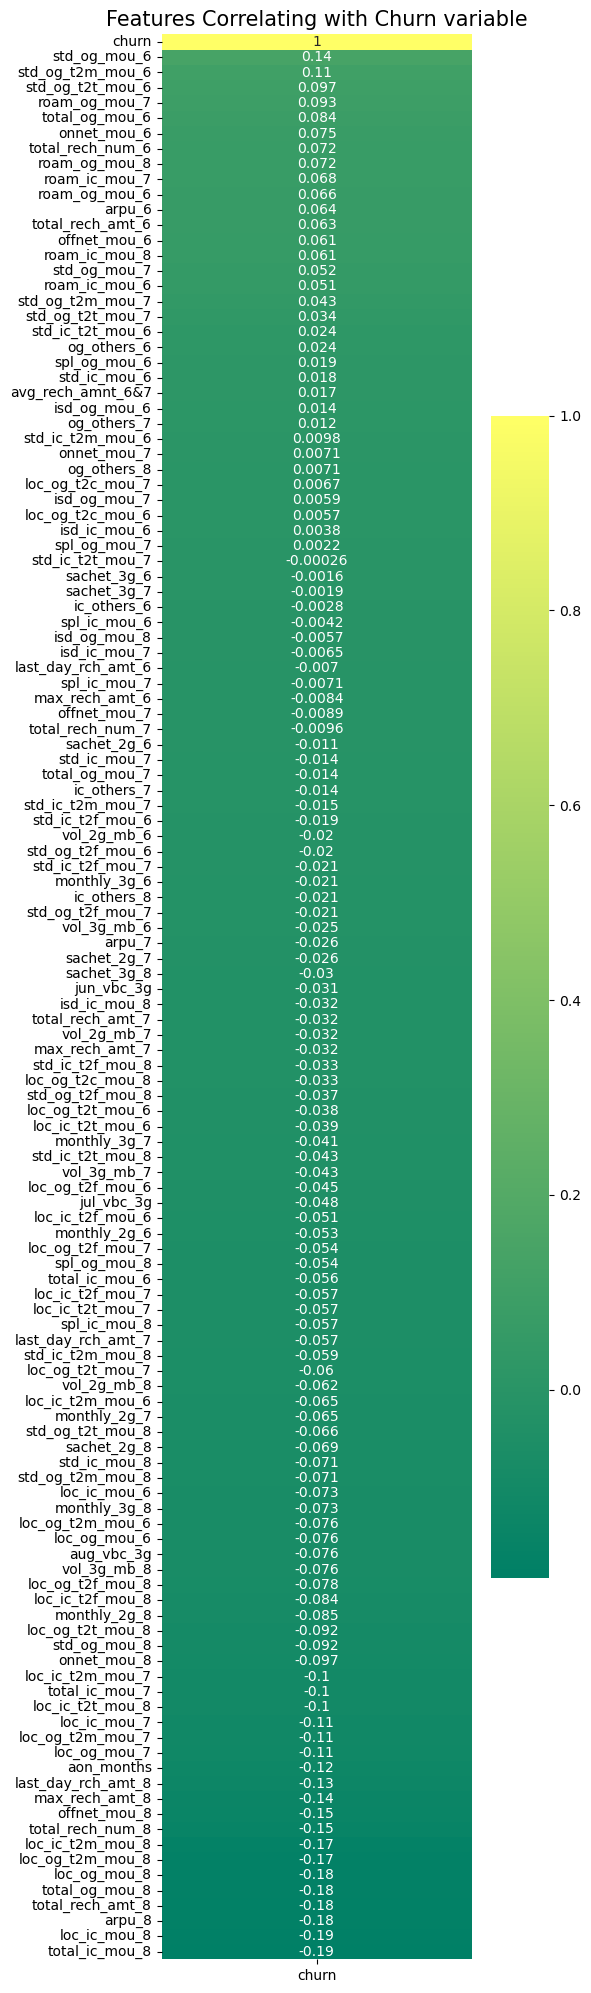

In [48]:
# correlation matrix to show the correlation of feature variable with target variable
plt.figure(figsize=(5,25))
heatmap_churn = sns.heatmap(telecom_high_val_cust.corr()[['churn']].sort_values(ascending=False, by='churn'),annot=True, 
                                cmap='summer')
heatmap_churn.set_title("Features Correlating with Churn variable", fontsize=15)

By boxplots, scatterplots and statistical analysis of feature variable we saw that most feature have clear outlier which needs to be handled otherwise they can affect model building

# Data Preparation

## Handling Outlier

Capping and flooring all the values between 95 and 5 percentile

In [49]:
# as we saw that many columns have outliers so capping and flooring the values between 5 and 95 percentile

# creating array of columns with numercial datatype
cols = telecom_high_val_cust.select_dtypes(include=['int64','float64']).columns

for col in cols:
    percentiles = telecom_high_val_cust[col].quantile([0.05, 0.95]).values
    telecom_high_val_cust[col][telecom_high_val_cust[col] <= percentiles[0]] = percentiles[0]
    telecom_high_val_cust[col][telecom_high_val_cust[col] >= percentiles[1]] = percentiles[1]

## Train-Test Splitting

In [113]:
# splitting dataset by target and feature variable
y = telecom_high_val_cust['churn']
X = telecom_high_val_cust.drop('churn',axis=1)

In [114]:
#test train split, using stratify=y as it is an imbalanced dataset wrt y
X_train_,X_test_ , y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=42, stratify=y)

In [115]:
# checking shape train and test dataset
print('training dataset::' , X_train_.shape)
print('testing dataset::' , X_test_.shape)

training dataset:: (20985, 125)
testing dataset:: (8994, 125)


In [117]:
# inspect training dataset
X_train_.head()

arpu_6    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
11828  675.127  1164.636  408.971      1154.90     1208.691       328.64   
15401  357.130   327.527  631.498        18.13       20.080        44.98   
12913  618.109   445.357  640.733        20.94        9.890        10.11   
10484  434.831   374.923  464.570       251.64      122.290       195.64   
26752  209.456   585.597  493.098        20.54       93.380        45.61   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
11828        172.14        358.48        214.84           3.99           0.00   
15401        212.31        351.79        454.71           0.00           0.00   
12913        126.56         22.43         77.88           0.00           0.00   
10484        235.78        256.93        300.14           0.00           0.00   
26752        315.03       1111.56        939.99           8.23           3.96   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
11828         62.813          23.84           0.00         114.90   
15401         55.410           0.00           0.00         114.90   
12913          0.000           0.00           0.00           0.00   
10484          0.000           0.00           0.00           0.00   
26752          1.940          71.54          13.53          23.24   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
11828             32.51             26.68              4.91             63.08   
15401             14.89             17.46             10.53             22.01   
12913             18.93              9.14              9.58             90.34   
10484            105.28             58.49            100.89            155.33   
26752              8.51             27.08              4.15             10.73   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
11828             91.53             60.66             0.000             0.000   
15401             56.44             43.14             0.000             0.510   
12913             21.36             71.06            19.590             1.060   
10484            166.71            150.49            33.583            34.095   
26752             18.69             17.44             0.000             0.000   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
11828             0.000               0.0              6.88              0.00   
15401             3.360               3.2              0.83              0.00   
12913             6.810               0.0              0.00              0.00   
10484            31.286               0.0              0.00              0.00   
26752             0.000               0.0              0.25              0.81   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
11828         95.59        118.21         65.58           986.583   
15401         36.91         74.43         57.04             3.230   
12913        128.88         31.58         87.46             0.000   
10484        331.91        313.03        362.13           146.360   
26752         19.24         45.78         21.59             7.410   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
11828           1029.55            186.71             99.61           251.690   
15401              2.61              5.41            176.94           291.060   
12913              0.75              0.53              7.56             0.000   
10484             63.79             94.74              1.25             1.050   
26752             63.59             41.46            237.36          1004.757   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
11828             11.84               0.0              0.00               0.0   
15401            233.09               0.0              0.00               0.0   
12913              0.00               0.0  

### Feature Scaling

In [118]:
# scaling features using StandardScaler
scaler = StandardScaler()
# performing fit transform on train dataset
X_train = scaler.fit_transform(X_train_)

In [119]:
# performing transform on test dataset
X_test = scaler.transform(X_test_)

### Handling class imbalance

As the dataset is highly imbalance so we'll use smote technique to handle data imbalance

In [120]:
# resampling the data by smote technique
smt = SMOTE(sampling_strategy='auto')
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train_,y_train)

In [121]:
# checking the target value distribution 
y_resampled_smt.value_counts()

1    19173
0    19173
Name: churn, dtype: int64

We can see that both the classes are equal in number now

# PCA

- While computng the principal components, we'll not include the entire dataset. Model building is all about doing well on the data we haven't seen yet!
- So we'll calculate the PCs using the train data, and apply them later on the test data

In [122]:
# performing PCA on train dataset as the too many columns won't be helpful in model building
pca = PCA(random_state=42)
pca.fit(X_resampled_smt)

PCA(random_state=42)

In [123]:
columns = list(X.columns)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':columns})
df_pca.head(10)

PC1       PC2       PC3        Feature
0  0.091024 -0.011695 -0.267313         arpu_6
1  0.131189  0.141057 -0.030383         arpu_7
2  0.114166  0.281234  0.052492         arpu_8
3  0.145342 -0.140870  0.010533    onnet_mou_6
4  0.172360 -0.031314  0.180194    onnet_mou_7
5  0.126680  0.078090  0.168709    onnet_mou_8
6  0.148569 -0.038727 -0.338476   offnet_mou_6
7  0.184302  0.092971 -0.110796   offnet_mou_7
8  0.133708  0.195344 -0.003153   offnet_mou_8
9 -0.001587  0.002586  0.001445  roam_ic_mou_6

Looking at the explained variance ratio for each component

In [124]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

In [125]:
# checking the variance % explained by variable
var_cumu

array([ 31.9881292 ,  49.19676979,  59.89733049,  68.53390847,
        76.27453484,  81.13882652,  84.74995625,  86.68874766,
        88.54124766,  89.84550346,  90.91827922,  91.95833029,
        92.74245502,  93.44708846,  94.11531132,  94.75583439,
        95.34072341,  95.79018611,  96.19494261,  96.55702516,
        96.90680602,  97.18575851,  97.44340994,  97.63157896,
        97.81328547,  97.9723914 ,  98.12047908,  98.25227871,
        98.37673603,  98.49863486,  98.61260183,  98.71250046,
        98.80973972,  98.90397274,  98.98216008,  99.0583303 ,
        99.12410927,  99.18831969,  99.24849097,  99.30522869,
        99.35811803,  99.40902797,  99.45796102,  99.50526454,
        99.55116367,  99.59599693,  99.63685603,  99.675907  ,
        99.70468344,  99.73119204,  99.75734021,  99.78308226,
        99.80606413,  99.82743634,  99.84250398,  99.8573257 ,
        99.87054705,  99.88348875,  99.89615819,  99.90685474,
        99.9169542 ,  99.92670164,  99.93546284,  99.94

Around 65 features explain 95% of model variance

But let's confirm this

In [126]:
#Using unsupervised way to check number of components so as to get 95% variance
pca2 = PCA(0.95,random_state=42)
df_pca_2 = pca2.fit_transform(X_resampled_smt)
df_pca_2.shape

(38346, 17)

We can see that 67 features explain 95% variance of the dataset

Let's plot scree plot 

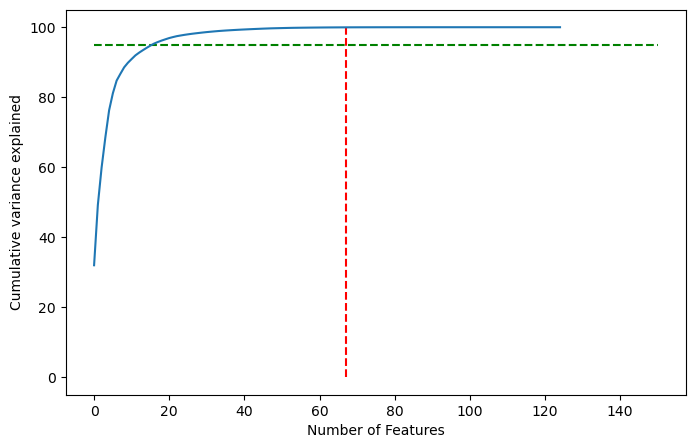

In [127]:
fig = plt.figure(figsize=[8,5])
plt.hlines(y=95, xmax=150, xmin=0, colors="g", linestyles="--")
plt.vlines(x=67, ymax=100, ymin=0, colors="r", linestyles="--")
plt.plot(var_cumu)
plt.xlabel('Number of Features')
plt.ylabel("Cumulative variance explained")
plt.show()

scree plot confirms that 95% variance is explained by 67 features

In [128]:
print("Shape of train datatset before : "+str(X_train_.shape))
print("Percenatge of Churned customer data : "+str(round(100*y.sum()/len(y),2)))
print("\n Applying SMOTE to normalize imbalance \n ")

#Using SMOTE: Synthetic Minority Over-sampling Technique
#Apply resampling on train data only, as test should be unseen 
# using this technique(SMOTE) as data is skewed 
print("Shape of train datatset after SMOTE : "+str(X_resampled_smt.shape))

# Applying PCA to data after resampling
pca_final = IncrementalPCA(n_components=67)    
X_train_pca = pca_final.fit_transform(X_resampled_smt)
X_test_pca = pca_final.transform(X_test_)

print("Shape of train datatset after PCA : "+str(X_train_pca.shape))

Shape of train datatset before : (20985, 125)
Percenatge of Churned customer data : 8.64

 Applying SMOTE to normalize imbalance 
 
Shape of train datatset after SMOTE : (38346, 125)
Shape of train datatset after PCA : (38346, 67)


Checking for Multicollinearity

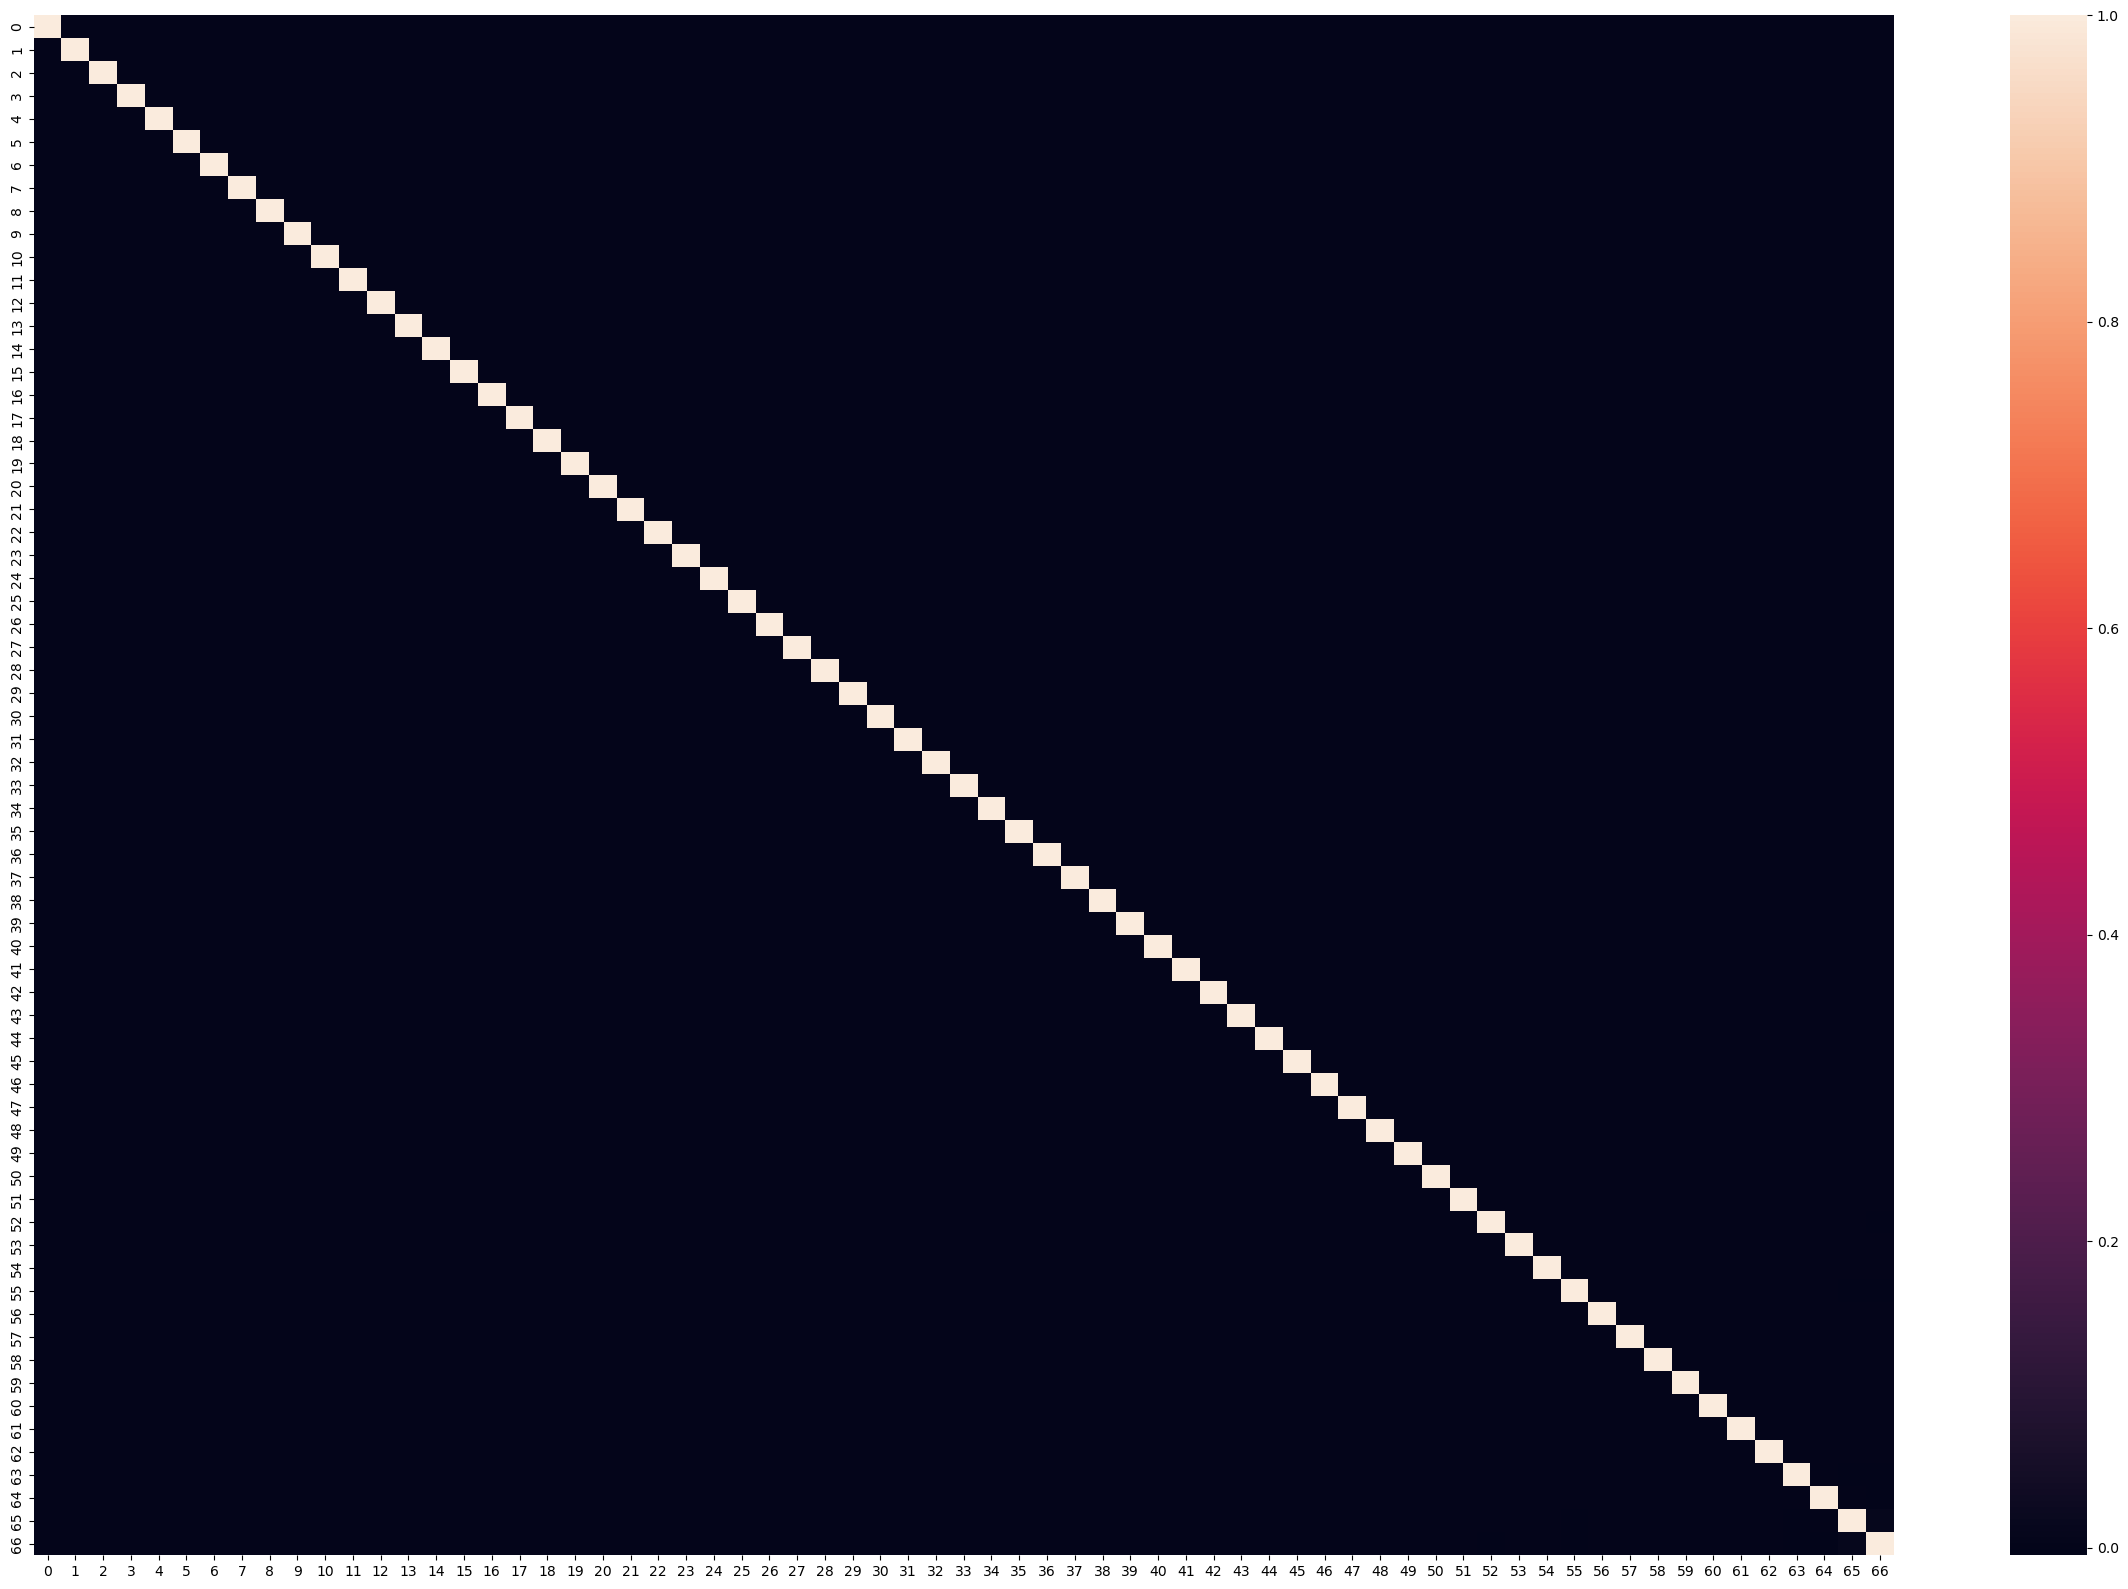

In [129]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (30,20))
sns.heatmap(np.corrcoef(X_train_pca.transpose()))
plt.show()

The heatplot does shows that there is no multicollinearity among the feature variables and we can move ahead with model building

# Model Building

In [130]:
# defining a function to evaluate metrics Recall , precision , accuracy, F1 score, AUC
def evaluate_model(y_test,y_pred,model):
    accuracy = round(accuracy_score(y_test,y_pred),2)
    recall = round(recall_score(y_test,y_pred),2)
    precision = round(precision_score(y_test,y_pred),2)
    auc = round(roc_auc_score(y_test,y_pred),2)
    f1 = round(f1_score(y_test,y_pred),2)
    
    data = [[model,accuracy,recall,precision,auc,f1]] 
    df = pd.DataFrame(data, columns = ['Model_Name','Accuracy','Precision','Recall','AUC','F1'])
    return df

### Model 1: Logistic Regression

In [143]:
#building model with logistic regression
logreg = LogisticRegression()
model_pca = logreg.fit(X_train_pca,y_resampled_smt)

In [144]:
#Making predictions on train set
pred_prob_train = model_pca.predict_proba(X_train_pca)[:,1]

In [145]:
pred_prob_train

array([0.97708301, 0.14775106, 0.45456702, ..., 0.69376916, 0.92260733,
       0.8000456 ])

Calculating optimal cutoff using precision recall curve

In [146]:
p, r, thresholds = precision_recall_curve(y_resampled_smt, pred_prob_train)

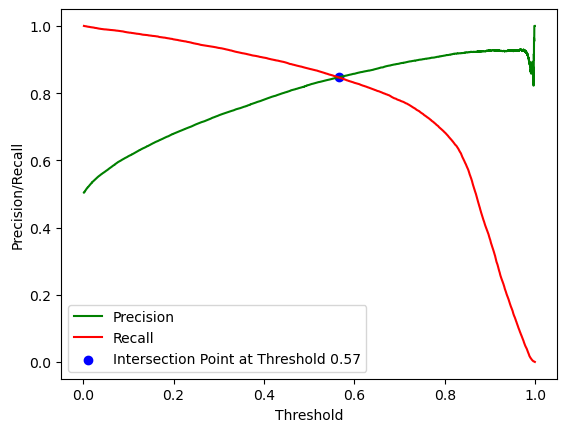

In [147]:
# plotting Precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-",label='Precision')
plt.plot(thresholds, r[:-1], "r-",label='Recall')

# add legend and axis labels

plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
# Find intersection points
intersection_points = [(r, p, t) for r, p, t in zip(r, p, thresholds) if r == p]

# Mark intersection points on the plot
for point in intersection_points:
    plt.scatter(point[2], point[0], c='blue', marker='o', label=f'Intersection Point at Threshold {point[2]:.2f}')

plt.legend(loc='lower left')
plt.show()

In [148]:
# Making predictions on test set
pred_prob_test = model_pca.predict_proba(X_test_pca)[:,1]

In [149]:
pred_prob_test

array([0.51258087, 0.8517664 , 0.04383191, ..., 0.46213301, 0.17884156,
       0.03642815])

In [150]:
# Converting y_test to dataframe
pred_df = pd.DataFrame(pred_prob_test)

In [151]:
pred_df.columns=['pred_probs_test']

In [152]:
pred_df['y_pred']= pred_df.pred_probs_test.map(lambda x: 1 if x > 0.57 else 0)

In [153]:
y_pred_logreg = pred_df['y_pred']

In [154]:
# displaying model performance using evaluation metrices
evaluate_model(y_test,y_pred_logreg,'Logistic Regression')

Model_Name  Accuracy  Precision  Recall   AUC    F1
0  Logistic Regression      0.85       0.81    0.34  0.83  0.48

## Model-2 : Decision Tree

In [163]:
dtc = DecisionTreeClassifier()

In [164]:
dtc.fit(X_train_pca,y_resampled_smt)

DecisionTreeClassifier()

In [165]:
y_pred_dtc = dtc.predict(X_test_pca)

In [166]:
evaluate_model(y_test, y_pred_dtc,'Decision Tree')

Model_Name  Accuracy  Precision  Recall   AUC    F1
0  Decision Tree      0.84        0.5    0.27  0.69  0.35

## Model-3 : Decision Tree with Hyperparameter tuning

In [167]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [168]:
grid_search = GridSearchCV(estimator=dtc, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [169]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [170]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=20)

In [171]:
# fitting with the best estimators on the training set
dtc_best = grid_search.best_estimator_.fit(X_train_pca,y_resampled_smt)

In [172]:
y_pred_dtc_ht = dtc_best.predict(X_test_pca)

In [173]:
# displaying model performance using evaluation metrices
evaluate_model(y_test, y_pred_dtc_ht,'Decision Tree with Hyperparameter tuning')

Model_Name  Accuracy  Precision  Recall  AUC  \
0  Decision Tree with Hyperparameter tuning      0.84       0.75    0.32  0.8   

     F1  
0  0.45

## Model 4 : Random Forest

In [155]:
rfc = RandomForestClassifier()
rfc.fit(X_train_pca,y_resampled_smt)


RandomForestClassifier()

In [156]:
# Making predictions on test set
y_pred_rfc = rfc.predict(X_test_pca)

In [157]:
evaluate_model(y_test,y_pred_rfc,'Random Forest')

Model_Name  Accuracy  Precision  Recall   AUC    F1
0  Random Forest      0.92       0.53    0.52  0.74  0.53

## Model-5 : Random Forest with Hyperparameter Tuning

In [174]:
param_grid = {
    'max_depth': [5,10,15,20],
    'n_estimators': [100,200],
    'min_samples_leaf': [5,10,15,20]
}

rf = RandomForestClassifier()

rf_grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 4, n_jobs = -1,verbose = 1,return_train_score=True)

In [175]:
rf_grid_search.fit(X_train_pca,y_resampled_smt)

Fitting 4 folds for each of 32 candidates, totalling 128 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [5, 10, 15, 20],
                         'n_estimators': [100, 200]},
             return_train_score=True, verbose=1)

In [176]:
print('We can get accuracy of '+str(round(rf_grid_search.best_score_,2))+' using '+str(rf_grid_search.best_params_))

We can get accuracy of 0.94 using {'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 200}


In [177]:
# fitting with the best estimators on the training set
rfc = rf_grid_search.best_estimator_
rfc.fit(X_train_pca,y_resampled_smt)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=200)

In [178]:
# Making predictions on test set
y_pred_rfc_ht = rfc.predict(X_test_pca)

In [179]:
# displaying model performance using evaluation metrices
evaluate_model(y_test,y_pred_rfc_ht,'Random Forest with Hyperparameter Tuning')

Model_Name  Accuracy  Precision  Recall  \
0  Random Forest with Hyperparameter Tuning      0.91       0.65    0.49   

    AUC    F1  
0  0.79  0.56

## Model-6 : Adaboost

In [180]:
adaboost = AdaBoostClassifier(random_state=42)

In [181]:
# defining the parameters for hyperparameter tuning
params = { 'n_estimators' : [5,10,20,50,100,200]}

In [182]:
# Hyperparameter tuning
adaboost_grid_search = GridSearchCV(estimator=adaboost,
                                   param_grid= params,
                                   cv = 4,
                                   n_jobs=-1,
                                   verbose = 1,
                                   return_train_score=True)

# fitting with estimators on the training set
adaboost_grid_search.fit(X_train_pca,y_resampled_smt)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


GridSearchCV(cv=4, estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'n_estimators': [5, 10, 20, 50, 100, 200]},
             return_train_score=True, verbose=1)

In [183]:
adaboost = adaboost_grid_search.best_estimator_

In [184]:
# fitting with the best estimators on the training set
adaboost.fit(X_train_pca,y_resampled_smt)

AdaBoostClassifier(n_estimators=200, random_state=42)

In [185]:
# Making predictions on test set
y_pred_ada = adaboost.predict(X_test_pca)

In [186]:
# displaying model performance using evaluation metrices
evaluate_model(y_test,y_pred_ada,'Adaboost')

Model_Name  Accuracy  Precision  Recall  AUC    F1
0   Adaboost      0.85       0.75    0.34  0.8  0.47

## Model-7 : XG Boost

In [187]:
xgb = xgb.XGBClassifier()

In [188]:
# fitting on train dataset
xgb.fit(X_train_pca,y_resampled_smt)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [189]:
# Making predictions on test set
y_pred_xg = xgb.predict(X_test_pca)

In [190]:
# displaying model performance using evaluation metrices
evaluate_model(y_test,y_pred_xg,'XG Boost')

Model_Name  Accuracy  Precision  Recall   AUC    F1
0   XG Boost       0.9        0.6    0.46  0.77  0.52

## Model-8 : XG Boost with Hyperparameter Tuning

In [191]:
# defining the parameters for hyperparameter tuning
parameters = {
              'learning_rate': [0.1, 0.2, 0.3],
              'gamma' : [10,20,50],
              'max_depth': [2,3,4],
              'min_child_weight': [25,50],
              'n_estimators': [150,200,500]
                }

# Hyperparameter tuning
xgb_grid_search = GridSearchCV(
                               estimator=xgb,
                               param_grid=parameters,
                               scoring='roc_auc', 
                               cv=4, n_jobs=-1, verbose=1
                                )
# fitting with estimators on the training set
xgb_grid_search.fit(X_train_pca, y_resampled_smt)

Fitting 4 folds for each of 162 candidates, totalling 648 fits


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None

In [192]:
# fitting with the best estimators on the training set
xgb = xgb_grid_search.best_estimator_.fit(X_train_pca,y_resampled_smt)

In [193]:
# Making predictions on test set
y_pred_xg_ht = xgb.predict(X_test_pca)

In [194]:
# displaying model performance using evaluation metrices
evaluate_model(y_test, y_pred_xg_ht,'XG Boost with Hyperparameter Tuning')

Model_Name  Accuracy  Precision  Recall   AUC   F1
0  XG Boost with Hyperparameter Tuning      0.88       0.73    0.39  0.81  0.5

# Conclusion

#### Compairing performance of all the models

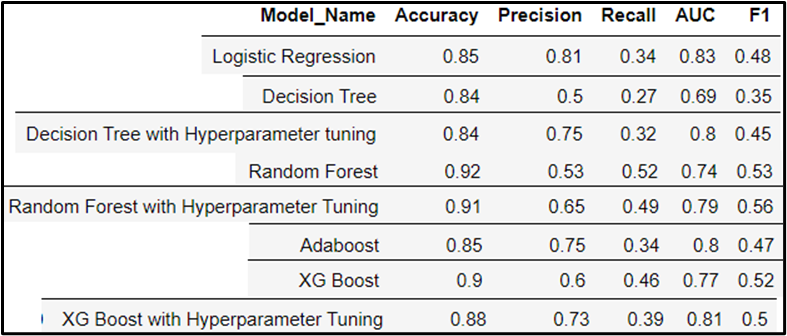

Given our business problem, to retain their customers, we need higher recall. As giving an offer to an user not going to churn will cost less as compared to loosing a customer and bring new customer, we need to have high rate of correctly identifying the true positives, hence recall.

We see that Random forest without hyperparameter tuning gives best result with best recall score and good balance between precision and recall and has highest accuracy

So we'll go with Random Forest (without hyperparameter tuning) model as it is a simpler form which will take less time to make prediction.

Note that we are not carrying out PCA here as we need to know the feature importances

In [195]:
final_model = RandomForestClassifier()
final_model.fit(X_resampled_smt,y_resampled_smt)

RandomForestClassifier()

In [196]:
# calculating feature importance of feature variable
imp_df = pd.DataFrame({
    "Feature_Name": X_train_.columns,
    "Importance": final_model.feature_importances_
})

In [197]:
# displaying top 10 features
imp_df.sort_values(by="Importance", ascending=False).head(10)

Feature_Name  Importance
14        roam_og_mou_8    0.080694
80       total_ic_mou_8    0.050973
11        roam_ic_mou_8    0.050544
65         loc_ic_mou_8    0.048644
95     total_rech_amt_8    0.047311
59     loc_ic_t2m_mou_8    0.045527
2                arpu_8    0.039208
29         loc_og_mou_8    0.034757
53       total_og_mou_8    0.031403
101  last_day_rch_amt_8    0.024131

We can see that all the top 10 belongs to action phase 

## Business Insights

- As indicated by feature importance , action phase is an important indicator whether customer will churn or not. Company needs to be very attentive for the customers who are in action phase and monitor their actions closely so that they won't loose out any customer


- Telecom company needs to pay attention to the roaming rates. They need to provide good offers to the customers who are using services from a roaming zone.


- The company needs to focus on the local calls for both incoming in t2m category and all outgoing calls.


- Average revenue per customer in action phase is a good indicator wheather customer will churn or not . They need to focus on customer with less recharge amount and try to reach them asap


- The churners have tenure less than 120 months so they need to focus on those customer and not invest time on customer with tenure greater than 120 months 


- Company must look into total and last day recharge of action phase, customer with low recharge can be a potential churners. They need to reach out to those customer and provide them with some good offers or discounts on recharge or more internet data . 


- To look into the issues stated above, it is desired that the telecom company collects customer query and complaint data and work on their services according to the needs of customers.


- Models with high recall are the best for predicting churn. Use the PCA + Random forest model to predict churn. It has an accuracy of 92% with a good balance between precision and recall